In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

import os
homedir=os.getenv("HOME")

## GOAL I: Apply Tempel+[2014, 2017] catalogs to NED-LVS

#### Load catalogs, plot results in RA-DEC space

In [2]:
path = homedir+'/Desktop/'

#catalog contains all nedlvs objects with a 'G' object type
nedlvs_parent = Table.read(path+'wisesize/nedlvs_parent_v1.fits')

nedlvs_tempel2014 = Table.read(path+'wisesize/nedlvs_tempel2014.fits')
nedlvs_tempel2017 = Table.read(path+'wisesize/nedlvs_tempel2017.fits')

In [6]:
#RA_1, DEC_1, Z, fil_id, fil_dist [distance from the nearest filament axis
#                                 (or from filament end point) in units of h^−1 Mpc]

fil_ra_all = nedlvs_tempel2014['RA_1']
fil_dec_all = nedlvs_tempel2014['DEC_1']
filadist_all = nedlvs_tempel2014['fil_dist']

/Users/k215c316/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


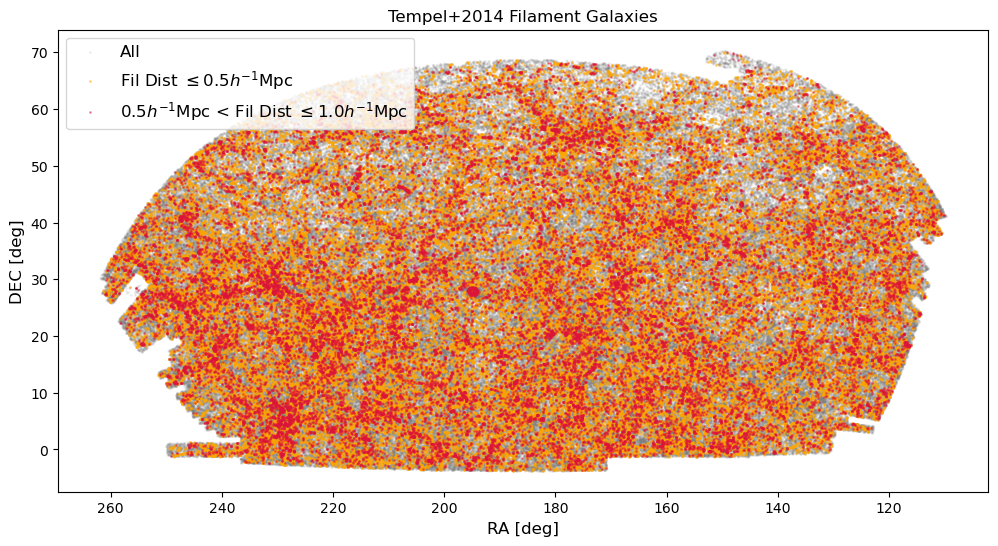

In [7]:
plt.figure(figsize=(12,6))

plt.scatter(fil_ra_all[(filadist_all>1.0)], fil_dec_all[(filadist_all>1.0)],
            s=1,alpha=0.1,color='gray',label=r'All') 

plt.scatter(fil_ra_all[filadist_all<=0.5],fil_dec_all[filadist_all<=0.5],s=1,color='orange',alpha=0.4,
            label=r'Fil Dist $\leq 0.5 h^{-1}$Mpc')

plt.scatter(fil_ra_all[(filadist_all>0.5)&(filadist_all<=1.0)], fil_dec_all[(filadist_all>0.5)&(filadist_all<=1.0)],
            s=1,alpha=0.4,color='crimson',label=r'$0.5 h^{-1}$Mpc < Fil Dist $\leq 1.0 h^{-1}$Mpc')    

plt.gca().invert_xaxis()
plt.title('Tempel+2014 Filament Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=12)

plt.show()

In [11]:
#RA, DEC, Z, GroupID, Ngal
group_ra_all = nedlvs_tempel2017['RA']
group_dec_all = nedlvs_tempel2017['DEC']
groupid_all = nedlvs_tempel2017['GroupID']
ngal_all = nedlvs_tempel2017['Ngal']

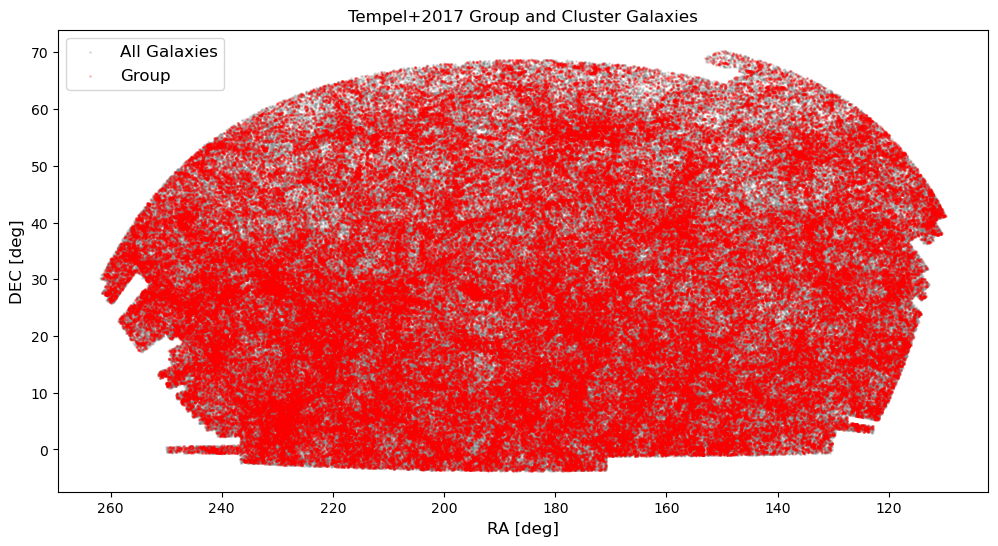

In [15]:
plt.figure(figsize=(12,6))

plt.scatter(group_ra_all[groupid_all==0],group_dec_all[groupid_all==0],s=1,
            color='gray',alpha=0.2,label='All Galaxies')
plt.scatter(group_ra_all[(groupid_all!=0)], group_dec_all[(groupid_all!=0)],
            s=1,alpha=0.2,color='red',label='Group')    
#plt.scatter(group_ra_all[(groupid_all!=0)&(ngal_all>=5)], group_dec_all[(groupid_all!=0)&(ngal_all>=5)],
#            s=1,alpha=0.3,color='Blue',label=r'N$\geq$5 Groups')   

plt.gca().invert_xaxis()
plt.title('Tempel+2017 Group and Cluster Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=12)

plt.show()

## GOAL II: Create environment flags from Tempel+[2014, 2017], Kourkchi+Tully (2017) catalogs

In [191]:
%run environment_flags.py

USAGE:
    * create_tempel2017_flag(nedlvs_parent, nedlvs_tempel2017) 
         -- outputs flag and two arrays (NED-LVS galaxies in Tempel+2017, groupIDs, Ngal)
    * create_tempel2014_flag(nedlvs_parent, nedlvs_tempel2014) 
         -- outputs flag (NED-LVS galaxies in Tempel+2014)
    * create_kt2017_flag(nedlvs_parent, nedlvs_kt2017)
         -- outputs flag (NED-LVS galaxies in Kourkchi+Tully 2017)
    * tempel2017_gc_flag(nedlvs_parent, nedlvs_tempel2017, tempel2017_groups, cluster=False, group=False)
         -- outputs flag for NED-LVS galaxies in Tempel+2017 clusters, or groups
    * tempel2014_filament_flags(nedlvs_parent, nedlvs_tempel2014) 
         -- outputs two flags for NED-LVS galaxies near (<0.5 h^-1 Mpc) or far from a filament (0.5 < dist < 1.0 h^-1 Mpc)
    * tempel_field_flag(nedlvs_parent) 
         -- outputs flag --> galaxies in Tempel catalogs but NOT in any of the environments are True; else, False.
    * KT2017_rpg_flag(nedlvs_parent, nedlvs_kt2017, kt2017_gro

In [192]:
nedlvs_parent = add_all_flags(nedlvs_parent, nedlvs_tempel2014, nedlvs_tempel2017, tempel2017_groups,
                             nedlvs_kt2017, kt2017_groups)

In [193]:
write_nedlvs_parent(nedlvs_parent, path, version_integer=1)

In [154]:
m200 = np.log10(tempel2017_groups['M200']*1e12)
ngal = tempel2017_groups['Ngal']

z_flag = (tempel2017_groups['zcmb']>.002) & (tempel2017_groups['zcmb']<0.025)

group_flag = (m200<14) & z_flag

cluster_flag = (m200>14) & z_flag

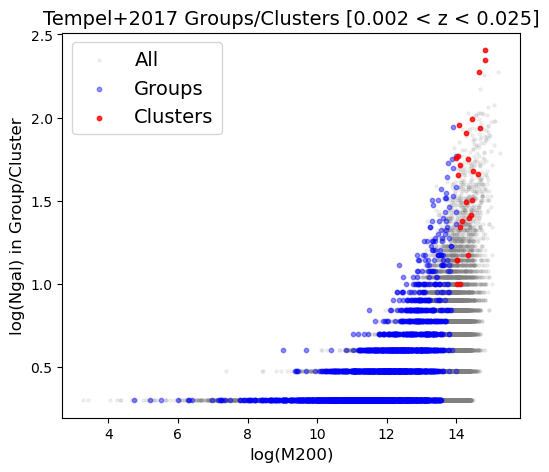

In [155]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(m200,np.log10(ngal),s=5,color='gray',label='All',alpha=0.1)
plt.scatter(m200[group_flag],np.log10(ngal[group_flag]),s=10,color='blue',alpha=0.4,label='Groups')
plt.scatter(m200[cluster_flag],np.log10(ngal[cluster_flag]),s=10,color='red',alpha=0.8,label='Clusters')


plt.xlabel('log(M200)',fontsize=12)
plt.ylabel('log(Ngal) in Group/Cluster',fontsize=12)
plt.legend(fontsize=14)

plt.title('Tempel+2017 Groups/Clusters [0.002 < z < 0.025]',fontsize=14)

plt.show()

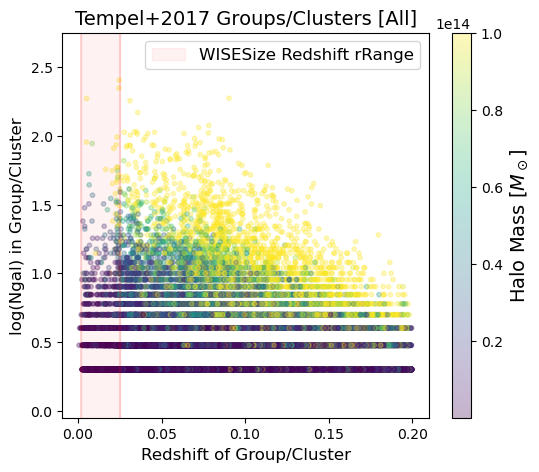

In [156]:
#Is there a relationship between Ngal and redshift? CHECK.
#color code by M200.

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(tempel2017_groups['zcmb'],np.log10(ngal),s=10,
            alpha=0.3,
            c=tempel2017_groups['M200']*1e12,vmin=1e10,vmax=1e14)
#plt.scatter(m200[group_flag],np.log10(ngal[group_flag]),s=10,color='blue',alpha=0.4,label='Groups')
#plt.scatter(m200[cluster_flag],np.log10(ngal[cluster_flag]),s=10,color='red',alpha=0.8,label='Clusters')

cb=plt.colorbar()
cb.set_label(r'Halo Mass [$M_\odot$]',fontsize=14)

p1 = np.poly1d(np.polyfit(tempel2017_groups['zcmb'][ngal>2],np.log10(ngal[ngal>2]),1))
x_p = np.linspace(np.min(tempel2017_groups['zcmb'][ngal>2]),np.max(tempel2017_groups['zcmb'][ngal>2]),500)

plt.xlabel('Redshift of Group/Cluster',fontsize=12)
plt.ylabel('log(Ngal) in Group/Cluster',fontsize=12)

line1=plt.axvline(0.002,alpha=0.15,color='red')
line2=plt.axvline(0.025,alpha=0.15,color='red')
plt.fill_between([0.002,0.025],y1=min(np.log10(ngal)-0.5),y2=max(np.log10(ngal))+0.5,alpha=0.05,color='red',
                label='WISESize Redshift rRange')

plt.ylim(-0.05,2.75)

plt.title('Tempel+2017 Groups/Clusters [All]',fontsize=14)
plt.legend(fontsize=12)
#print(p1)

plt.show()

In [166]:
#number of unique galaxy groups in Tempel+2017 U WISESize sample

#convert objnames from tempel catalog to a set
tempel_names = set(groupid for groupid in nedlvs_tempel2017[nedlvs_tempel2017['WISESize_flag']& \
                                                            nedlvs_tempel2017['tempel2017_flag']]['GroupID'])

#create a boolean mask for whether each name in the parent table is in the nedlvs-tempel2014 table
flag = [groupid in tempel_names for groupid in tempel2017_groups['GroupID']]

ind = tempel2017_groups[flag]['GroupID']-1   #group 422 is index 421, etc.
tempel2017_groups_cut = tempel2017_groups[ind]

m200 = tempel2017_groups_cut['M200']
mean_all=np.mean(tempel2017_groups_cut['Ngal'])
median_all=np.median(tempel2017_groups_cut['Ngal'])

cluster_flag = (m200*1e12 >= 1e14)
group_flag = (m200*1e12 < 1e14)

mean_cluster = np.mean(tempel2017_groups_cut['Ngal'][cluster_flag])
median_cluster = np.median(tempel2017_groups_cut['Ngal'][cluster_flag])

mean_group = np.mean(tempel2017_groups_cut['Ngal'][group_flag])
median_group = np.median(tempel2017_groups_cut['Ngal'][group_flag])

print('STATISTICS FOR GALAXIES IN WISESize')
print('-----')
print(f'Number of unique groups/clusters: {len(ind)}')
print(f'Mean number of galaxies per unique group/cluster: {int(mean_all)}')
print(f'Median number of galaxies per unique group/cluster: {int(median_all)}')
print()
print(f'Number of unique clusters: {len(tempel2017_groups_cut[cluster_flag])}')
print(f'Mean number of galaxies per unique cluster: {int(mean_cluster)}')
print(f'Median number of galaxies per unique cluster: {int(median_cluster)}')
print()
print(f'Number of unique groups: {len(tempel2017_groups_cut[group_flag])}')
print(f'Mean number of galaxies per unique group: {int(mean_group)}')
print(f'Median number of galaxies per unique group: {int(median_group)}')

STATISTICS FOR GALAXIES IN WISESize
-----
Number of unique groups/clusters: 2998
Mean number of galaxies per unique group/cluster: 4
Median number of galaxies per unique group/cluster: 3

Number of unique clusters: 37
Mean number of galaxies per unique cluster: 57
Median number of galaxies per unique cluster: 46

Number of unique groups: 2961
Mean number of galaxies per unique group: 3
Median number of galaxies per unique group: 3


## GOAL III: Apply Tempel+[2014, 2017] catalogs to WISESize sample

#### Load catalogs, plot results in RA-DEC space

In [209]:
#note -- each catalog has already been matched with WISESize (with 10" error)
path = homedir+'/Desktop/wisesize/'
nedlvs_parent = Table.read(path+'nedlvs_parent_v1.fits')
wisesize_flag = nedlvs_parent['WISESize_flag']
nedlvs_parent = nedlvs_parent[wisesize_flag]
#wisesize = Table.read(path+'wisesize_v4.fits')
#tempel2014 = Table.read(path+'tempel2014_wisesize_filaments.fits')
#tempel2017 = Table.read(path+'tempel2017_wisesize_groupclus.fits')

In [210]:
#RA, DEC, Z, GroupID, Ngal
ra = nedlvs_parent['RA']
dec = nedlvs_parent['DEC']
z = nedlvs_parent['Z']
groupid = nedlvs_parent['tempel2017_groupIDs']
ngal = nedlvs_parent['tempel2017_Ngal']

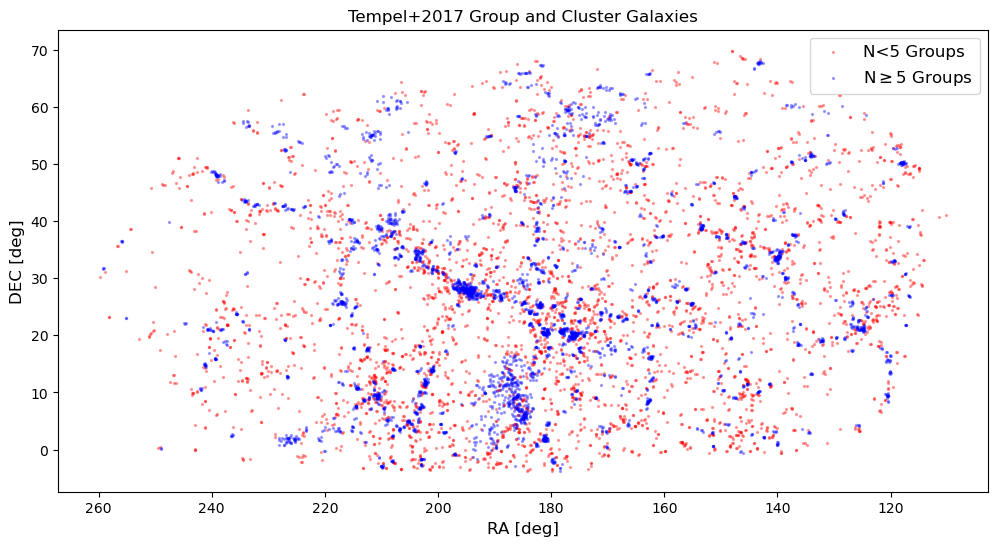

In [211]:
plt.figure(figsize=(12,6))

#plt.scatter(group_ra[groupid==0],group_dec[groupid==0],s=1,color='gray',alpha=0.4,label='All Galaxies')
plt.scatter(ra[(groupid>0)&(ngal<5)], dec[(groupid>0)&(ngal<5)],
            s=2,alpha=0.3,color='red',label='N<5 Groups')    
plt.scatter(ra[(groupid>0)&(ngal>=5)], dec[(groupid>0)&(ngal>=5)],
            s=2,alpha=0.3,color='Blue',label=r'N$\geq$5 Groups')   

plt.gca().invert_xaxis()
plt.title('Tempel+2017 Group and Cluster Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=12)

plt.show()

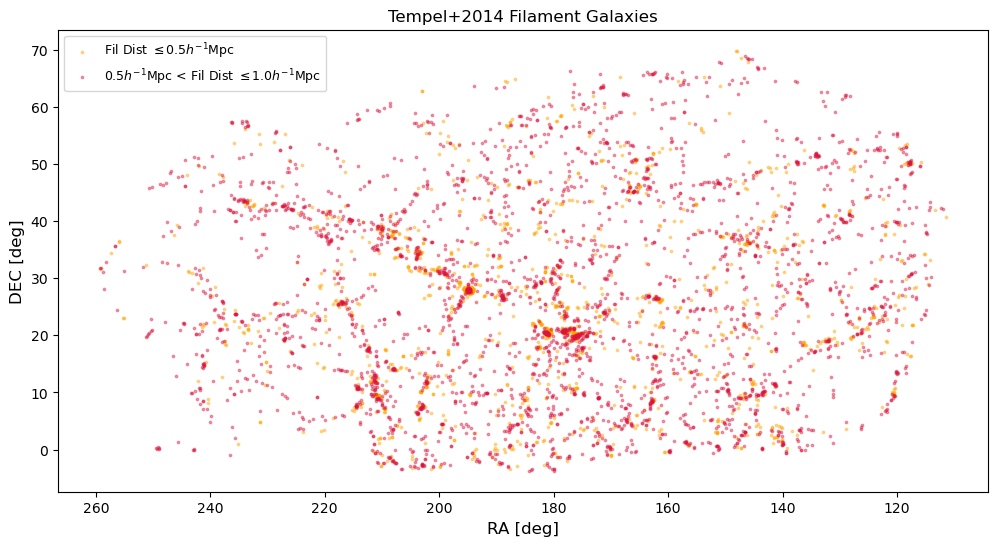

In [215]:
plt.figure(figsize=(12,6))

#plt.scatter(ra[(filadist>1.0)], dec[(filadist>1.0)],
#            s=1,alpha=0.2,color='gray',label=r'All') 

plt.scatter(ra[nedlvs_parent['tempel2014_farfilament_flag']],
            dec[nedlvs_parent['tempel2014_farfilament_flag']],
            s=3,color='orange',alpha=0.4,
            label=r'Fil Dist $\leq 0.5 h^{-1}$Mpc')

plt.scatter(ra[nedlvs_parent['tempel2014_nearfilament_flag']], 
            dec[nedlvs_parent['tempel2014_nearfilament_flag']],
            s=3,alpha=0.4,color='crimson',label=r'$0.5 h^{-1}$Mpc < Fil Dist $\leq 1.0 h^{-1}$Mpc')    

plt.gca().invert_xaxis()
plt.title('Tempel+2014 Filament Galaxies',fontsize=12)
plt.xlabel('RA [deg]',fontsize=12)
plt.ylabel('DEC [deg]',fontsize=12)
plt.legend(fontsize=9)

plt.show()

#### Find number of galaxies in both groups and filaments

In [244]:
#first, isolate all galaxies in groups
groupgal = nedlvs_parent[(groupid>0)]
print(f'Number of galaxies in groups: {len(groupgal)} of {len(nedlvs_parent)}')
#subtract np.unique result by 2, to remove the 0 (galaxies in no group) and -99 (non-matches to Tempel+2017)
print(f'Number of groups: {len(np.unique(groupgal["tempel2017_groupIDs"]))-2}')

Number of galaxies in groups: 7605 of 16331
Number of groups: 2998


In [223]:
#isolate all galaxies in filaments
#will create two subtables -- one for dist <= 0.5, one for dist <= 1.0
filamentgalA = nedlvs_parent[nedlvs_parent['tempel2014_nearfilament_flag']]
filamentgalB = nedlvs_parent[nedlvs_parent['tempel2014_farfilament_flag']]
print(f'Number of galaxies <= 0.5 h^-1 Mpc from nearest filament spine: {len(filamentgalA)} of {len(nedlvs_parent)}')
print(f'Number of galaxies <= 1.0 h^-1 Mpc from nearest filament spine: {len(filamentgalB)} of {len(nedlvs_parent)}')

Number of galaxies <= 0.5 h^-1 Mpc from nearest filament spine: 3220 of 16331
Number of galaxies <= 1.0 h^-1 Mpc from nearest filament spine: 1378 of 16331


In [246]:
#combine Tempel+2014, Tempel+2017, and WISESize table
filgroup = nedlvs_parent[nedlvs_parent['tempel2017_flag']&nedlvs_parent['tempel2014_flag']]

#9198 matches for galaxies that are in WISESize, Tempel+2014, AND Tempel+2017 catalogs

print(f'# {len(filgroup)} matches for galaxies that are in WISESize, Tempel+2014, AND Tempel+2017 catalogs')
print('-----')

pg_flag = (filgroup['tempel2017_groupIDs']>0) & (filgroup['tempel2017_Ngal']<5)
rg_flag = (filgroup['tempel2017_groupIDs']>0) & (filgroup['tempel2017_Ngal']>=5)
filA_flag = (filgroup['tempel2014_nearfilament_flag'])
filB_flag = (filgroup['tempel2014_farfilament_flag'])

field_flag = (filgroup['tempel2017_groupIDs']==0) & (~filA_flag) & (~filB_flag)

print(f'# Galaxies in poor group and <=0.5 h^-1 Mpc distance to filament: {len(filgroup[pg_flag&filA_flag])}')
print(f'# Galaxies in poor group and <=1.0 h^-1 Mpc distance to filament: {len(filgroup[pg_flag&filB_flag])}')
print()
print(f'# Galaxies in rich group and <=0.5 h^-1 Mpc distance to filament: {len(filgroup[rg_flag&filA_flag])}')
print(f'# Galaxies in rich group and <=1.0 h^-1 Mpc distance to filament: {len(filgroup[rg_flag&filB_flag])}')
print()
print(f'# Galaxies in poor group only: {len(filgroup[pg_flag&~filB_flag])}')
print(f'# Galaxies in rich group only: {len(filgroup[rg_flag&~filB_flag])}')
print()
print(f'# Galaxies in <=0.5 h^-1 Mpc distance to filament only: {len(filgroup[~pg_flag&~rg_flag&filA_flag])}')
print(f'# Galaxies in <=1.0 h^-1 Mpc distance to filament only: {len(filgroup[~pg_flag&~rg_flag&filB_flag])}')
print()
print(f'# Galaxies in none of the above environments: {len(filgroup[field_flag])}')

# 9198 matches for galaxies that are in WISESize, Tempel+2014, AND Tempel+2017 catalogs
-----
# Galaxies in poor group and <=0.5 h^-1 Mpc distance to filament: 1269
# Galaxies in poor group and <=1.0 h^-1 Mpc distance to filament: 459

# Galaxies in rich group and <=0.5 h^-1 Mpc distance to filament: 796
# Galaxies in rich group and <=1.0 h^-1 Mpc distance to filament: 488

# Galaxies in poor group only: 2695
# Galaxies in rich group only: 2111

# Galaxies in <=0.5 h^-1 Mpc distance to filament only: 1092
# Galaxies in <=1.0 h^-1 Mpc distance to filament only: 406

# Galaxies in none of the above environments: 1947


#### Comparing M$_{200}$ and $\Sigma_5$ 2D projected surface densities for WISESize sample
##### * for each galaxy, find its group and assign that galaxy the group's M$_{200}$ and Ngal
##### * plot $\Sigma_5$ vs. M$_{200}$ in log-log space, color-coded by Ngal

In [560]:
#create group dictionary! {groupid: m200}
m200_dict = group_dict = {
        groupid: m200*1e12
        for groupid, m200 in zip(tempel2017_groups['GroupID'], tempel2017_groups['M200'])
}

ngal_dict = group_dict = {
        groupid: ngal
        for groupid, ngal in zip(tempel2017_groups['GroupID'], tempel2017_groups['Ngal'])
}

In [561]:
#isolate galaxies in Tempel+2017
nedlvs = nedlvs_parent[nedlvs_parent['tempel2017_flag']]

In [563]:
#list of m200
m200_list = []

ngal_list = []

for n in range(len(nedlvs)):
    
    #get group ID
    groupid = nedlvs['tempel2017_groupIDs'][n]
    
    #create m200 list
    m200_list.append(-99) if groupid==0 else m200_list.append(m200_dict[groupid])
    ngal_list.append(1) if groupid==0 else ngal_list.append(ngal_dict[groupid])

In [582]:
len(nedlvs[m200_flag])

286849

In [564]:
#create m200 flag for cases where groupid = 0 -- that is, galaxy is by its lonesome
m200_flag = (np.asarray(m200_list)>0)

In [587]:
m200 = np.log10(np.asarray(m200_list)[m200_flag])
Sigma5 = np.log10(nedlvs['2D_5NN'][m200_flag])
ngal = np.log10(np.asarray(ngal_list)[m200_flag])

z=nedlvs['Z'][m200_flag]

In [590]:
z_flag = (z>.002) & (z<.025)

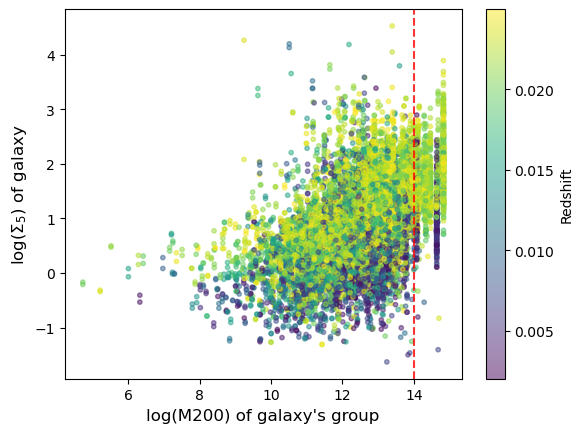

In [591]:
plt.scatter(m200[z_flag],Sigma5[z_flag],s=10,alpha=0.5,c=z[z_flag])
plt.axvline(14,color='r',ls='--',alpha=0.8)
plt.ylabel(r'log($\Sigma_5$) of galaxy',fontsize=12)
plt.xlabel("log(M200) of galaxy's group",fontsize=12)
plt.colorbar(label="Redshift")
plt.show()

## GOAL IV: Match NEDLVS with Kourkchi & Tully (2017) group catalog, determine number of galaxies with same rich group, poor group flags.

In [544]:
nedlvs = Table.read(homedir+'/Desktop/wisesize/nedlvs_parent_v1.fits')

In [545]:
#first isolate galaxies in both KT2017 and Tempel2017
flag = (nedlvs['tempel2017_flag']) & (nedlvs['KT2017_flag'])

nedlvs_cross = nedlvs[flag]

print(f'# Galaxies in NED-LVS, Tempel+2017, and Kourkchi & Tully (2017): {len(nedlvs_cross)}')

# Galaxies in NED-LVS, Tempel+2017, and Kourkchi & Tully (2017): 4222


In [546]:
#of these galaxies, compare rich group membership
print(f'# Kourkchi+Tully (2017) galaxies in rich groups: {len(nedlvs_cross[nedlvs_cross["KT2017_rg_flag"]])}')
print(f'# Tempel+2017 galaxies in rich groups: {len(nedlvs_cross[nedlvs_cross["tempel2017_richgroup_flag"]])}')
print()
both_rg = (nedlvs_cross['tempel2017_richgroup_flag']) & (nedlvs_cross['KT2017_rg_flag'])
print(f'Fraction of galaxies in rich groups in both catalogs: {len(nedlvs_cross[both_rg])/len(nedlvs_cross):.2f}')

# Kourkchi+Tully (2017) galaxies in rich groups: 1546
# Tempel+2017 galaxies in rich groups: 1182

Fraction of galaxies in rich groups in both catalogs: 0.21


In [547]:
#compare poor group membership
print(f'# Kourkchi+Tully (2017) galaxies in poor groups: {len(nedlvs_cross[nedlvs_cross["KT2017_pg_flag"]])}')
print(f'# Tempel+2017 galaxies in poor groups: {len(nedlvs_cross[nedlvs_cross["tempel2017_poorgroup_flag"]])}')
print()
both_rg = (nedlvs_cross['tempel2017_poorgroup_flag']) & (nedlvs_cross['KT2017_pg_flag'])
print(f'Fraction of galaxies in poor groups in both catalogs: {len(nedlvs_cross[both_rg])/len(nedlvs_cross):.2f}')

# Kourkchi+Tully (2017) galaxies in poor groups: 789
# Tempel+2017 galaxies in poor groups: 1323

Fraction of galaxies in poor groups in both catalogs: 0.13
